In [3]:
#importing libraries
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [5]:
np.random.seed(101)
tf.set_random_seed(101)
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 (evenly spaced)
x = np.linspace(0, 50, 50) 
# Adding noise to the random linear data 
# The function generates random numbers from a uniform distribution (floating point numbers in [-4,4))
x += np.random.uniform(-4, 4, 50)
# 50 values of y generated from a random distribution with mean=0 and standard deviation=1
y = np.random.normal(0,1,50)
# Number of data points, n = 50
n=len(x)

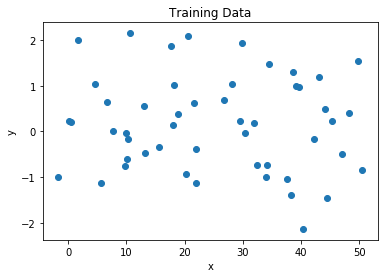

In [6]:
# Plot of Training Data 
# A scatter plot showing observations
plt.scatter(x, y) 
# Labeling the axes, plot is titled
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
# Display plot
plt.show()

In [11]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")
# Creating and initialising variables
learning_rate=0.01
training_epochs=1000
# y_pred = X*W+b
y_pred=tf.add(tf.multiply(X,W),b)
# Calculating cost
cost=tf.divide(tf.reduce_sum(tf.pow(tf.subtract(y_pred,Y),2)),tf.cast(tf.multiply(2,n),tf.float32))
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
# Global Variables Initializer 
init = tf.global_variables_initializer() 

Instructions for updating:
Use tf.cast instead.


In [12]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    sess.run(init) 
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 0.6517808 W = 0.025622977 b = -0.6615282
Epoch 100 : cost = 0.63227683 W = 0.023835193 b = -0.5741128
Epoch 150 : cost = 0.6169958 W = 0.022238363 b = -0.49603403
Epoch 200 : cost = 0.60505456 W = 0.020812133 b = -0.42629698
Epoch 250 : cost = 0.59575045 W = 0.019538244 b = -0.3640089
Epoch 300 : cost = 0.5885267 W = 0.018400438 b = -0.30837455
Epoch 350 : cost = 0.5829413 W = 0.017384147 b = -0.25868207
Epoch 400 : cost = 0.5786439 W = 0.016476426 b = -0.21429823
Epoch 450 : cost = 0.57535726 W = 0.015665673 b = -0.17465559
Epoch 500 : cost = 0.57286173 W = 0.0149415275 b = -0.13924758
Epoch 550 : cost = 0.5709838 W = 0.014294725 b = -0.107621655
Epoch 600 : cost = 0.5695866 W = 0.01371702 b = -0.07937415
Epoch 650 : cost = 0.5685621 W = 0.013201026 b = -0.054143973
Epoch 700 : cost = 0.56782526 W = 0.01274015 b = -0.031608973
Epoch 750 : cost = 0.5673093 W = 0.012328504 b = -0.011481063
Epoch 800 : cost = 0.5669619 W = 0.011960827 b = 0.006496774
Epoch 850 : cost = 

In [13]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 0.5665632 Weight = 0.010843119 bias = 0.061148316 



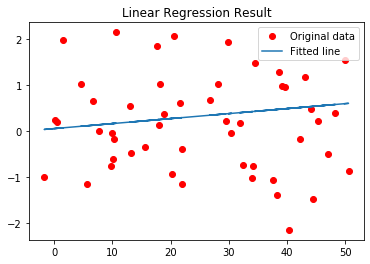

In [14]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 